In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pylab as mpl

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

In [4]:
data = pd.read_csv('2021年医生信息.csv') # 数据导入

In [5]:
RJhos = data[data["医院"]=="上海交通大学医学院附属瑞金医院"] # 筛选瑞金医院数据

In [6]:
RJhos.shape # 查看筛选后的数据条数，第一个数字代表筛选出的数据条数

(807, 23)

In [7]:
RJhos["开通时间"] = pd.to_datetime(RJhos['开通时间']) # 将开通时间字符型转化为时间型

C:\Users\DELL\AppData\Local\Temp\ipykernel_11424\801280585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RJhos["开通时间"] = pd.to_datetime(RJhos['开通时间']) # 将开通时间字符型转化为时间型


In [8]:
RJhos["上次在线"] = pd.to_datetime(RJhos['上次在线']) # 将上次在线时间字符型转化为时间型

C:\Users\DELL\AppData\Local\Temp\ipykernel_11424\2368649953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RJhos["上次在线"] = pd.to_datetime(RJhos['上次在线']) # 将上次在线时间字符型转化为时间型


In [9]:
s_date = datetime.datetime.strptime('20210401', '%Y%m%d').date() # 定一个时间标的，2021.4.1

In [10]:
old_hos = RJhos[RJhos['开通时间'].dt.date < s_date] # 筛选2021,4,1之前开通的医生

In [11]:
new_hos = RJhos[RJhos['开通时间'].dt.date >= s_date] # 筛选2021,4,1之后开通的医生

In [47]:
# s7_date = datetime.datetime.strptime('20230221', '%Y%m%d').date()

In [52]:
# d7_old_hos = old_hos[old_hos['上次在线'].dt.date > s7_date]

In [81]:
# d7_hos = RJhos[RJhos['上次在线'].dt.date > s7_date]

In [58]:
# s30_date = datetime.datetime.strptime('20230128', '%Y%m%d').date()

In [59]:
# d30_old_hos = old_hos[(old_hos['上次在线'].dt.date > s30_date) & (old_hos['上次在线'].dt.date <= s7_date)]

In [85]:
# d30_hos = RJhos[(RJhos['上次在线'].dt.date > s30_date) & (RJhos['上次在线'].dt.date <= s7_date)]

In [12]:
s365_date = datetime.datetime.strptime('20220228', '%Y%m%d').date() # 自定义的时间标签，这个数据最新时间是2023.2.28，这里设定比这个时间早一年的数据

In [13]:
d365_old_hos = old_hos[old_hos['上次在线'].dt.date > s365_date] 

In [14]:
d365_hos = RJhos[RJhos['上次在线'].dt.date > s365_date]

In [15]:
do_old_hos = old_hos[old_hos['上次在线'].dt.date <= s365_date]

In [16]:
do_hos = RJhos[RJhos['上次在线'].dt.date <= s365_date]

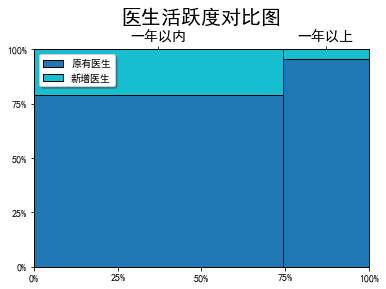

In [19]:
fig, ax = plt.subplots(1)
y = [d365_old_hos.shape[0]/d365_hos.shape[0], do_old_hos.shape[0]/do_hos.shape[0]]
x = np.array([d365_hos.shape[0],do_hos.shape[0]])
x_label = ['一年以内', '一年以上']
width = [i/sum(x) for i in x]

# calculate x coordinates based on the width of the previous bars
# same as: [0, width[0], width[0] + width[1], width[0] + width[1] + width[2]]
adjusted_x, temp = [0], 0
for i in width[:-1]:
    temp += i
    adjusted_x.append(temp)

# Marimekko chart
plt.bar(adjusted_x, y, width=width, align='edge', edgecolor='black',color='tab:blue')
plt.bar(adjusted_x, np.ones(len(y))-y, bottom=y, width=width, align='edge', edgecolor='black',color='tab:cyan')

# x and y ticks (%)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# 添加标题
plt.title("医生活跃度对比图", fontsize=20)

plt.legend(["原有医生","新增医生"],shadow=True,fancybox="blue")

plt.ylim(0,1)
plt.xlim(0,1)

# twin y-axis to draw x-ticks at the top
axy = ax.twiny()
axy.set_xticks([(width[i]/2)+ v for i, v in enumerate(adjusted_x)])
axy.set_xticklabels(x_label, fontsize=14)

plt.show()